In [39]:
import pickle
import numpy as np
import re
import matplotlib.pyplot as plt

file_train_bayes = "/home/paperspace/Projects/posteriors/examples/bayes_llama3/experiments/TQA/2024-05-09T20-53-51/results_train.pkl"
file_test_bayes = "/home/paperspace/Projects/posteriors/examples/bayes_llama3/experiments/TQA/2024-05-09T20-53-51/results_test.pkl"
file_train_zero = "/home/paperspace/Projects/posteriors/examples/bayes_llama3/experiments/TQA/2024-05-09T21-06-48/results_train.pkl"
file_test_zero = "/home/paperspace/Projects/posteriors/examples/bayes_llama3/experiments/TQA/2024-05-09T21-06-48/results_test.pkl"

file = file_test_bayes
with open(file, "rb") as f:
    results = pickle.load(f)

results

{'NDQ_000001': {'question': 'Steps of the scientific method include all of the following except\na. doing background research.\nb. constructing a hypothesis.\nc. asking a question.\nd. proving a theory.',
  'response': ' c. asking a question. The question is the',
  'expected_response': 'd. proving a theory.',
  'total_uncertainty': [7.340782e-05,
   7.7276316e-05,
   7.1377246e-05,
   5.7875404e-05,
   5.7949754e-05,
   7.0480746e-05,
   7.604886e-05,
   6.8303314e-05,
   6.868977e-05,
   7.171794e-05],
  'aleatoric_uncertainty': [7.258034e-05,
   7.650273e-05,
   7.1046445e-05,
   5.7694764e-05,
   5.792743e-05,
   6.948102e-05,
   7.525021e-05,
   6.7856294e-05,
   6.775199e-05,
   7.099105e-05],
  'epistemic_uncertainty': [8.274801e-07,
   7.735871e-07,
   3.308014e-07,
   1.806402e-07,
   2.2322638e-08,
   9.997239e-07,
   7.9865276e-07,
   4.4702028e-07,
   9.3777635e-07,
   7.2689e-07]},
 'NDQ_000002': {'question': 'Why do scientists call the Big Bang a theory?\na. It is probabl

In [32]:
def lcs(x, y):
    m = len(x)
    n = len(y)
    dp = np.zeros((m+1, n+1), dtype=int)

    for i in range(1, m+1):
        for j in range(1, n+1):
            if x[i-1] == y[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[m][n]

accuracy = 0
for key, val in results.items():
    val["response"] = re.sub(r'[^\w\s]','', val["response"])
    val["expected_response"] = re.sub(r'[^\w\s]','', val["expected_response"])
    hypothesis_words = val["response"].lower().split()
    reference_words = val["expected_response"].lower().split()
    print(val["response"], val["expected_response"])
    if lcs(hypothesis_words, reference_words):
        accuracy += 1

accuracy / len(results)

 c asking a question The question is the d proving a theory
 d All possible answers to a scientific idea are called c Many scientists have agreed upon this explanation after repeated experiments and models have shown it
 d all of the above You must record the d all of the above
 b A chart with nutritional information about food we b A chart with nutritional information about food we eat
 d none of the above If the results of d none of the above
 d More than one answer is correct All of d More than one answer is correct
 A The amount of damage each building receives a The amount of damage each building receives
 The correct answer is option A A theory can a A theory can never be disproven
 d all of the above because all of the above d all of the above
 d All of the above Conclusions are the d All of the above
 b You should tie back your hair if it b You should tie back your hair if it is long
 e physical model A physical model is a e physical model
 A control is a factor that is held co

0.7248803827751196

Text(0.5, 1.0, 'Bayesian ensemble uncertainties on test MCQ')

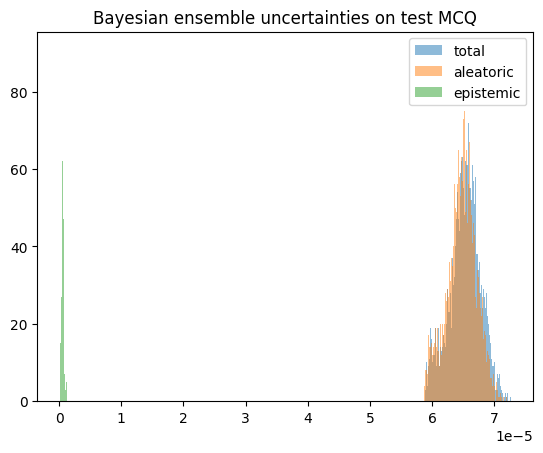

In [40]:
total_uncertainty = []
aleatoric_uncertainty = []
epistemic_uncertainty = []
for key, val in results.items():
    total_uncertainty.append(np.average(val["total_uncertainty"]))
    aleatoric_uncertainty.append(np.average(val["aleatoric_uncertainty"]))
    epistemic_uncertainty.append(np.average(val["epistemic_uncertainty"]))

plt.figure()
plt.hist(total_uncertainty, bins=100, label="total", alpha=0.5)
plt.hist(aleatoric_uncertainty, bins=100, label="aleatoric", alpha=0.5)
plt.hist(epistemic_uncertainty, bins=100, label="epistemic", alpha=0.5)
plt.legend()

plt.title("Bayesian ensemble uncertainties on test MCQ")